In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.activations import relu
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_blobs
import numpy as np
import random 
from pandas import  read_csv
from scipy.stats import ks_2samp
from scipy.spatial import distance_matrix

#import statistics 

tf.enable_eager_execution()


Using TensorFlow backend.


500 4050 450 1350 5000
(5000, 4)
(5000, 1)
N= 4
0 XX 0.018339936
xushape (4, 40)
sum tf.Tensor(1182.2227, shape=(), dtype=float32)
mod: 4 [0.9057     0.31955338 0.59172493 0.35431337] ==> 7 [0.2519416  0.14359598 0.63094443 0.74712574]
new: 4 [0.25194618 0.14360058 0.630949   0.74713033]


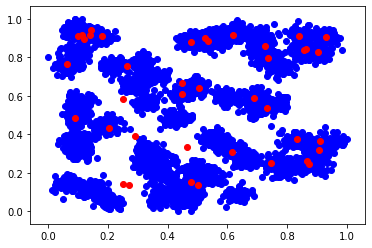

10 XX 0.015625399
xushape (4, 40)
sum tf.Tensor(10945.423, shape=(), dtype=float32)
mod: 3 [0.13783224 0.9315759  0.6651945  0.8919615 ] ==> 19 [0.47700503 0.1518987  0.19455695 0.76879853]
new: 3 [0.47700712 0.15190078 0.19455904 0.7688006 ]


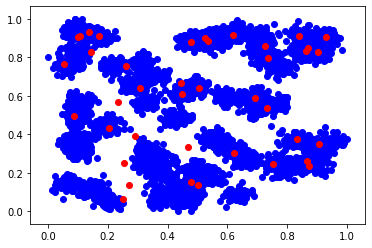

20 XX 0.014232857
xushape (4, 40)
sum tf.Tensor(10467.257, shape=(), dtype=float32)
mod: 31 [0.86246026 0.8435802  0.19005658 0.6305495 ] ==> 24 [0.29041153 0.3891335  0.08281444 0.3933301 ]
new: 31 [0.29042327 0.38914526 0.08282619 0.39334184]


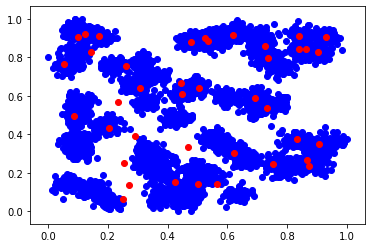

30 XX 0.013129786
xushape (4, 40)
sum tf.Tensor(10080.966, shape=(), dtype=float32)
mod: 11 [0.16975856 0.9086648  0.89714485 0.9413456 ] ==> 19 [0.4222171  0.15467158 0.13099043 0.82099235]
new: 11 [0.42233318 0.15478764 0.1311065  0.8211084 ]


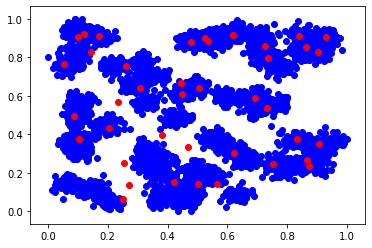

40 XX 0.012204668
xushape (4, 40)
sum tf.Tensor(9708.801, shape=(), dtype=float32)
mod: 2 [0.9020101 0.8288382 0.6809199 0.0961583] ==> 1 [0.8657641  0.2639269  0.3030214  0.88984495]
new: 2 [0.866204   0.26436687 0.30346137 0.8902849 ]


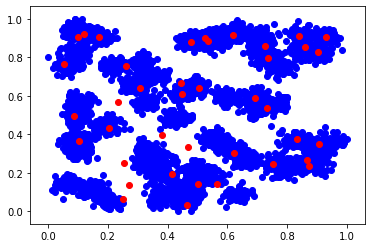

50 XX 0.011887368
xushape (4, 40)
sum tf.Tensor(9606.476, shape=(), dtype=float32)
mod: 10 [0.6205142  0.3005355  0.67366165 0.8932031 ] ==> 7 [0.2518659  0.06452082 0.54980445 0.684104  ]
new: 10 [0.25238454 0.06503949 0.5503231  0.6846227 ]


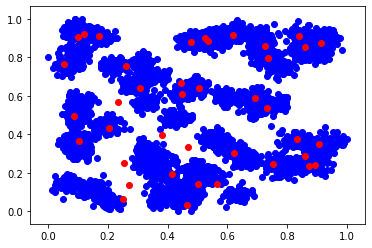

60 XX 0.011382195
xushape (4, 40)
sum tf.Tensor(9436.158, shape=(), dtype=float32)
mod: 26 [0.7247238  0.86017483 0.38577342 0.32364157] ==> 13 [0.26961458 0.13817053 0.33644906 0.11496078]
new: 26 [0.27150273 0.14005868 0.3383372  0.11684894]


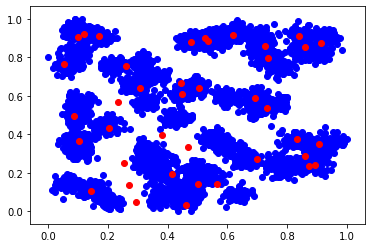

70 XX 0.010801581
xushape (4, 40)
sum tf.Tensor(9271.389, shape=(), dtype=float32)
mod: 1 [0.86038005 0.28557536 0.23167653 0.8596618 ] ==> 27 [0.64091843 0.86851174 0.40862334 0.30041587]
new: 1 [0.6429634  0.8705567  0.4106683  0.30246085]


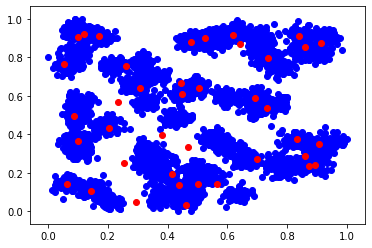

80 XX 0.010556693
xushape (4, 40)
sum tf.Tensor(9132.729, shape=(), dtype=float32)
mod: 1 [0.5387163  0.88481236 0.4416768  0.26109675] ==> 2 [0.8656137 0.2624722 0.302511  0.8908028]
new: 1 [0.867412  0.2642705 0.3043093 0.8926011]


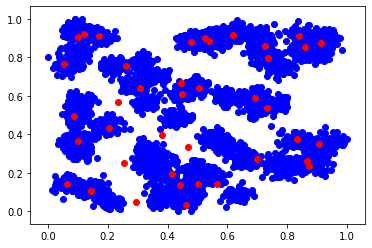

90 XX 0.010802472
xushape (4, 40)
sum tf.Tensor(9268.935, shape=(), dtype=float32)
mod: 1 [0.888098   0.23946433 0.42132264 0.9349668 ] ==> 27 [0.6406689  0.8686605  0.40868124 0.3002549 ]
new: 1 [0.6425694  0.870561   0.4105817  0.30215538]


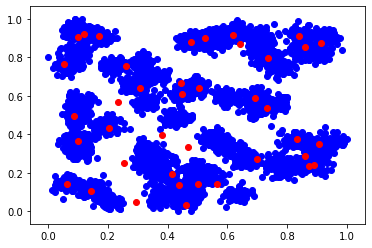

100 XX 0.010569348
xushape (4, 40)
sum tf.Tensor(9136.999, shape=(), dtype=float32)
mod: 1 [0.5336871  0.88326025 0.44121352 0.26665062] ==> 2 [0.86573255 0.26358584 0.3026208  0.8901346 ]
new: 1 [0.86762685 0.26548013 0.3045151  0.89202887]


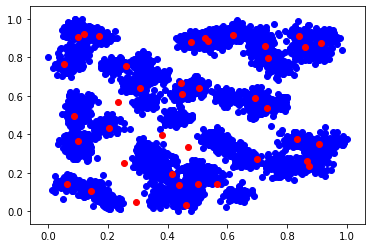

In [24]:
# hybrid model DLS my proposal
# P 05

EPOCHS = 100+1
es = 10

#H = M * 5
HS = 40
B = 32
A = 0.1
KI = 2

( x_train,y_train) = read_data_array_cv2("Out_clusters.csv")

print (np.array(x_train).shape)
print (np.array(y_train).shape)


class OutLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs = 1):
        super(OutLayer, self).__init__()
        self.num_outputs = num_outputs
        self.mode = 2


    def build (self, input_shape):
        self.num_inputs = input_shape[-1]
        self.freqlist = [0 for _ in range(self.num_inputs)]
        
    def call(self, input):
        #print ("call", input.shape)
        #print (input)
        if self.mode  == 1:
            result = tf.math.reduce_sum(input,axis=[1])
        else:
            result = tf.math.reduce_min(input,axis=[1])
            wn = tf.math.argmin(input, axis=1).numpy()
            for i in range(input.shape[0]):
                # self.freqlist[wn[i]] += 1     # count_winner
                self.freqlist[wn[i]] += input[i,wn[i]]  # sum_dist
        return result
    
        
class LSLayer(tf.keras.layers.Layer):
    
    def __init__(self,  num_outputs_s, indata,  Ara = 1.0, activation=sigmoid, km_init = 1, wstd = 0.3, bstd = 0.5):
        super(LSLayer, self).__init__()
        self.num_outputs_s = num_outputs_s 
        self.num_outputs = num_outputs_s 
        self.activation = activation
        self.traindata = indata
        self.Ara = Ara
        self.km_init = km_init
        self.wstd = wstd
        self.bstd = bstd
        
    def build(self, input_shape):  
        self.num_inputs = input_shape[-1]
        self.kernel = self.add_weight("kernel",
                                      shape=(int(input_shape[-1]),
                                             self.num_outputs), 
                                      initializer=tf.keras.initializers.RandomNormal(stddev=self.wstd),
                                     trainable=True)
            
        #print ( "set_circles ---------------------------")
        
        M = self.num_outputs_s
        
        if M == 0:
            return
        
        if self.km_init == 0:
            x_train =  self.traindata[0]
            y_train =  self.traindata[1]
            N = x_train.shape[0]   
            D = x_train.shape[1]   
            C = M
            #print ("C",C,"M",M)

            xu = self.get_weights()
            ilist = random.sample(range(N),M)
            print (ilist)
            print ("V", self.traindata[0].shape)

            for m in range(M):
                for c in range(D):
                    xu[0][c,m] = self.traindata[0][ilist[m],c]

            self.set_weights(xu )
        if self.km_init == 1:
            x_train =  self.traindata[0]
            y_train =  self.traindata[1]
            N = x_train.shape[0]   
            D = x_train.shape[1]   
            C = M
            #print ("C",C,"M",M)

            cls = KMeans(n_clusters=C, init="random",  n_init=1).fit(x_train)
            #cls = KMeans(n_clusters=C,   n_init=1).fit(x_train)

            centers = cls.cluster_centers_

            xu = self.get_weights()

            for m in range(M):
                for c in range(D):
                    xu[0][c,m] = centers[m][c]

            self.set_weights(xu )
        if self.km_init == 2:
            N = self.traindata[0].shape[0]
            
            ilist = random.sample(range(N),4*M)
            D = self.traindata[0].shape[1]   
            x_train = np.zeros((4*M, D))           
            C = M
            
            for m in range(4*M):
                for c in range(D):
                    x_train[m,c] = self.traindata[0][ilist[m],c]
            
            cls = KMeans(n_clusters=C,init="random",  n_init=1).fit(x_train)

            centers = cls.cluster_centers_

            xu = self.get_weights()

            for m in range(M):
                for c in range(D):
                    xu[0][c,m] = centers[m][c]

            self.set_weights(xu )
        
        #print ("end ==============================")
        
    
    # F2 method LS layer
    def call(self, input):
        
        #print ("CALL :", input.numpy())
        isp = input.shape
        In1 = tf.transpose(input)
        kernel_S = self.kernel
        
        # case spherical
        
        s_shape  = self.num_outputs_s 
        In2 = tf.stack([In1] * s_shape)
        InD = tf.transpose(In2)
        WD = tf.stack([kernel_S] * isp[0])
        ddd = WD - InD
        dd0 = tf.math.multiply(ddd, ddd)
        dd1 = tf.math.reduce_sum(dd0, axis =1)
        dd2 = tf.cast(dd1,tf.double)
        dd3 = tf.sqrt(dd2)
        d_r = tf.cast(dd3,tf.float32)
        result_S = relu(d_r)
                                
        return result_S
    
    
    def rearrange(self,freqlist ):
        
        xu = self.get_weights()
        xut = xu[0].transpose()
        dm = distance_matrix(xut,xut)
        N = xut.shape[0]
        D = xut.shape[1]
        dmin = dm[0,1]
        iw = 0
        jw = 1
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                if dm[i,j] < dmin:
                    dmin = dm[i,j]
                    iw = i
                    jw = j
        #print (iw,jw,xut[iw],xut[jw])   
        w2 = freqlist.index(max(freqlist))
        if type(w2) == list:
            w2 = w2[0]
        print ("sum",sum(freqlist))
        print ("mod:",iw,xut[iw],"==>",w2,xut[w2])
        
        m = iw
        for c in range(D):
            xu[0][c,m] = xu[0][c,w2]+ dmin**D

        self.set_weights(xu )
        print ("new:",iw,xut[iw])

        

class NN_Model(Model):
    
    def __init__(self, hs, indata,kinit):
        super(NN_Model, self).__init__()
        self.d1 = LSLayer(hs, indata,km_init = kinit)
        self.d2 = OutLayer()
        
    def call(self, x):
        x = self.d1(x)
        #print ("call benn:",x, tf.math.reduce_sum(x))
        return self.d2(x)
        
        


#@tf.function
def train_step(datas, labels,modelk,loss_objectk,optimizerk,train_lossk,train_accuracyk):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = modelk(datas, training=True)
        loss = loss_objectk(labels, predictions)
    gradients = tape.gradient(loss, modelk.trainable_variables)
    optimizerk.apply_gradients(zip(gradients, modelk.trainable_variables))

    train_lossk(loss)
    train_accuracyk(labels, predictions)

#@tf.function
def test_step(datas, labels,modelk,loss_objectk,test_lossk,test_accuracyk):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    
    predictions = modelk(datas, training=False)
    t_loss = loss_objectk(labels, predictions)

    test_lossk(t_loss)
    test_accuracyk(labels, predictions)
        

    

# (x_train,y_train,x_test,y_test) = gen_data_array_cv(K)


#K = 10

M = x_train.shape[1]
C = y_train.shape[1]

test_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(B)

gbest_v = 0
gbest_t = 0

ValA = []
TestA = []
ValAS = [0 for x in range(0,EPOCHS,es)]
TestAS = [0 for x in range(0,EPOCHS,es)]
X = [x for x in range(0,EPOCHS,es)]

print ("N=", x_train[0].shape[0])

#tf.logging.set_verbosity(tf.logging.ERROR)
K = 0
for k in range(1):
    
    best_v = 0
    best_t = 0
    
    # Create an instance of the model
    model =  NN_Model(HS,(x_train, y_train),  kinit=KI)

    loss_object = tf.keras.losses.MeanSquaredError()

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)
    #optimizer = tf.keras.optimizers.RMSprop()
    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.MeanSquaredError(name='train_accuracy')

    test_loss =  tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.MeanSquaredError(name='test_accuracy')
    
    val_loss = tf.keras.metrics.Mean(name='val_loss')
    val_accuracy = tf.keras.metrics.MeanSquaredError(name='val_accuracy')
    
    train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(B)
    val_ds =  tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(B)
 
    e = 0
    for epoch in range(EPOCHS):
      # Reset the metrics at the start of the next epoch

        train_loss.reset_states()
        train_accuracy.reset_states()
        test_loss.reset_states()
        test_accuracy.reset_states()
        

        for datas, labels in train_ds:
            #print ('A',datas.shape,labels.shape)
            train_step(datas, labels,model,loss_object,optimizer,train_loss,train_accuracy)


        for test_datas, test_labels in test_ds:
            #tpredictions = model[k](test_datas, training=False)
            test_step(test_datas, test_labels,model,loss_object,test_loss,test_accuracy)

        if K > 1:
            for val_datas, val_labels in val_ds:
                #vpredictions = model[k](val_datas, training=False)
                test_step(val_datas, val_labels,model,loss_object,val_loss,val_accuracy)
            
            
        if epoch % es == 0:
            print(epoch, "XX", test_accuracy.result().numpy())
            N = x_train.shape[0]
            Xx = [x_train[i,0] for i in range(N)]
            Xy = [x_train[i,1] for i in range(N)]
            plt.scatter(Xx,Xy,c="blue")
            xu = model.d1.get_weights()[0]
            print ("xushape",xu.shape)
            Cx = [xu[0,i] for i in range(xu.shape[1])]
            Cy = [xu[1,i] for i in range(xu.shape[1])]
            plt.scatter(Cx,Cy,c="red")
            model.d1.rearrange(model.d2.freqlist)
            model.d2.freqlist = [0 for _ in range(xu.shape[1])]

            plt.show()
        #if epoch == 1:
        #    model.d2.mode = 2
        #    optimizer.learning_rate = 0.03

            

    #plt.plot(X, Y,label="Accuracy curve")



In [23]:
x1 = [105,]
x2 = [0]
print (sum(x1)/len(x1),":", sum(x2)/len(x2))


164.0 : 0.0


In [1]:
def read_data_array_cv2(fnev):
    fin = open(fnev,"r")
    sor = fin.read().split("\n")
    sors = sor[0].split(",")
    M = int(sors[0])
    C = 1
    K = int(sors[2])
    Nte = 0
    Ntrt = 0
    Ntrv = 0
    Ntrv2 = 0
    i = 0
    while (sor[i+2][0:3] != "Tra"):
        i += 1
    Nte = i
    i = 0
    while (sor[i+3+Nte][0:3] != "Val"):
        i += 1
    Ntrt = i
    i = 0
    while (sor[i+4+Nte+Ntrt][0:3] != "Val"):
        i += 1
    Ntrv2 = i
    i = 0
    while (sor[i+5+Nte+Ntrt+Ntrv2][0:3] != "Tra"):
        i += 1
    Ntrv = i
    
    N = Nte + Ntrt + Ntrv

    print (Nte, Ntrt, Ntrv, Ntrv2,N)
    x2_train = np.zeros((N,M),dtype='float32')
    y2_train = np.zeros((N,C))
    
    ti = 0
    for i in range(2,2+Nte):
        sors = sor[i].split(",")
        for j in  range(M):
            x2_train[ti,j] = float(sors[j])
        ti += 1
    k = 0            
    base = 2+Nte  +1
    for i in range( base, base + Ntrt ):
        sors = sor[i].split(",")
        for j in  range(M):
            x2_train[ti,j] = float(sors[j])
        ti += 1

    base = base + (Ntrt + 1)
    for i in range(base, base + Ntrv2 ):
        sors = sor[i].split(",")

    base = base + (Ntrv2 + 1)
    for i in range(base, base + Ntrv ):
        sors = sor[i].split(",")
        for j in  range(M):
            x2_train[ti,j] = float(sors[j])
        ti += 1
        

    fin.close()
    
    return (x2_train,y2_train)    

In [17]:
from scipy.spatial import distance_matrix
D = np.array([[1,3],[3,4],[1,5]])
print (D)
print (D.transpose())
dm = distance_matrix(D,D)
print (dm)
dm = distance_matrix(D.transpose(),D.transpose())
print (dm)


[[1 3]
 [3 4]
 [1 5]]
[[1 3 1]
 [3 4 5]]
[[0.         2.23606798 2.        ]
 [2.23606798 0.         2.23606798]
 [2.         2.23606798 0.        ]]
[[0.         4.58257569]
 [4.58257569 0.        ]]


In [22]:
def proba (l):
    l[1] = 0

x = [1,3,4]
print (x)
proba(x)
print(x)

[1, 3, 4]
[1, 0, 4]
